In [4]:
# A script to normalize energy demand. Using 18 degrees celsius as a base temperature, 
# we calculate degree days by taking the difference between the daily average temperature
# and the base temperature. Then we normalize electricity demand by dividing demand (AIL_demand)
# by the degree days in that hour 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [46]:
df = pd.read_csv("msa_merged_data_old.csv",index_col='BEGIN_DATE_GMT')
df.tail()

HE  POOL_PRICE  AIL_DEMAND  Avg_temp  Weighted_Avg_Temp  \
BEGIN_DATE_GMT                                                                 
2020-12-30 19:00:00  13       35.10     10590.0    -3.225          -1.768968   
2020-12-30 20:00:00  14       34.04     10519.0    -2.650          -1.299453   
2020-12-30 21:00:00  15       34.77     10535.0    -2.050          -0.006591   
2020-12-30 22:00:00  16       35.61     10598.0    -2.350          -0.833002   
2020-12-30 23:00:00  17       37.92     10872.0    -2.800          -1.124149   

                     future 1  future 2   future 3   future 4   WTI spot  \
BEGIN_DATE_GMT                                                             
2020-12-30 19:00:00  61.80196  61.92965  62.019033  62.044571  61.597656   
2020-12-30 20:00:00  61.80196  61.92965  62.019033  62.044571  61.597656   
2020-12-30 21:00:00  61.80196  61.92965  62.019033  62.044571  61.597656   
2020-12-30 22:00:00  61.80196  61.92965  62.019033  62.044571  61.597656   
2020-12-30 23:00:00  61.80196  61.92965  62.019033  62.044571  61.597656   

                     dayofweek  month  year  holiday  workingday  
BEGIN_DATE_GMT                                                    
2020-12-30 19:00:00          2     12  2020        0           1  
2020-12-30 20:00:00          2     12  2020        0           1  
2020-12-30 21:00:00          2     12  2020        0           1  
2020-12-30 22:00:00          2     12  2020        0           1  
2020-12-30 23:00:00          2     12  2020        0           1

In [47]:
# Using a base temperature of 18 degrees celsius, calculate CDD (Cooling Degree Days) and HDD (Heating Degree Days)
# by taking the difference between base and average temperature and multiply by the number of days. The data is hourly, 
# so it is multiplied by 1/24 days
base_temp = 18
degree_days = []
for value in df['Avg_temp']:
    if (value < base_temp) or (value > base_temp) :
      degree_days.append((base_temp - value)*(1/24))
    else :
      degree_days.append(0)   # if avg temp is the same as base temp, the CDD/HDD is 0

df['Degree_Days'] = degree_days
df.head()

HE  POOL_PRICE  AIL_DEMAND  Avg_temp  Weighted_Avg_Temp  \
BEGIN_DATE_GMT                                                                
2010-01-01 07:00:00  1       51.12      8307.0   -24.100         -22.952601   
2010-01-01 08:00:00  2       48.79      8186.0   -23.775         -22.588126   
2010-01-01 09:00:00  3       39.56      8075.0   -23.425         -22.339761   
2010-01-01 10:00:00  4       36.27      8013.0   -23.000         -21.877969   
2010-01-01 11:00:00  5       36.16      7982.0   -22.400         -21.527531   

                      future 1   future 2  future 3   future 4   WTI spot  \
BEGIN_DATE_GMT                                                              
2010-01-01 07:00:00  84.591078  85.224136  85.77417  86.261936  84.601456   
2010-01-01 08:00:00  84.591078  85.224136  85.77417  86.261936  84.601456   
2010-01-01 09:00:00  84.591078  85.224136  85.77417  86.261936  84.601456   
2010-01-01 10:00:00  84.591078  85.224136  85.77417  86.261936  84.601456   
2010-01-01 11:00:00  84.591078  85.224136  85.77417  86.261936  84.601456   

                     dayofweek  month  year  holiday  workingday  Degree_Days  
BEGIN_DATE_GMT                                                                 
2010-01-01 07:00:00          4      1  2010        1           0     1.754167  
2010-01-01 08:00:00          4      1  2010        1           0     1.740625  
2010-01-01 09:00:00          4      1  2010        1           0     1.726042  
2010-01-01 10:00:00          4      1  2010        1           0     1.708333  
2010-01-01 11:00:00          4      1  2010        1           0     1.683333

<AxesSubplot:xlabel='BEGIN_DATE_GMT'>

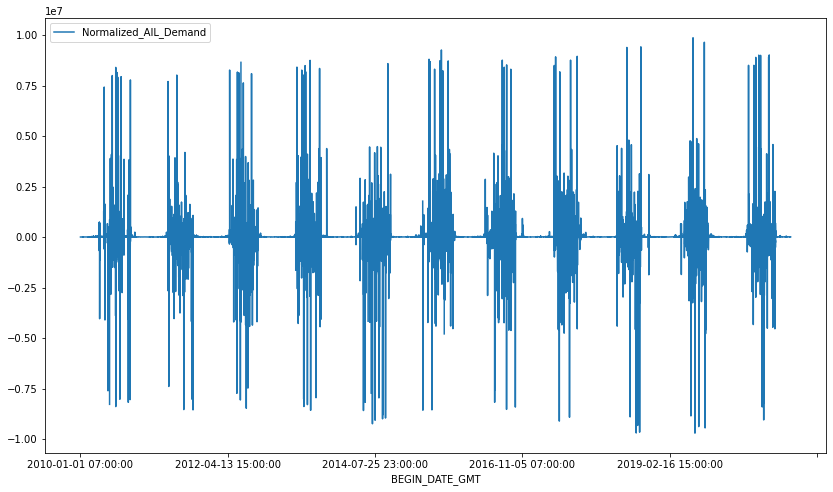

In [48]:
# Normalize electricity demand based on CDD and HDD
df['Normalized_AIL_Demand'] = df.AIL_DEMAND / df.Degree_Days

df.plot(figsize=(14,8) ,y='Normalized_AIL_Demand')

In [49]:
import plotly.graph_objects as go
data = pd.read_csv("msa_merged_data_old.csv")
data["BEGIN_DATE_GMT"] = pd.to_datetime(data["BEGIN_DATE_GMT"])
data.set_index("BEGIN_DATE_GMT", drop=False, inplace=True)

temp_df = data[["AIL_DEMAND", "year", 'Avg_temp']].copy()
base_temp = 18
degree_days = []
for value in temp_df['Avg_temp']:
    if (value < base_temp) or (value > base_temp):
        degree_days.append((base_temp - value)*(1/24))
    else:
        degree_days.append(0)
temp_df['Degree_Days'] = degree_days

# temp_df = temp_df.groupby(by = temp_df.index.date).sum()
# temp_df.index = pd.to_datetime(temp_df.index)
temp_df['Normalized_AIL_Demand'] = temp_df.AIL_DEMAND / temp_df.Degree_Days

temp_df.head()

AIL_DEMAND  year  Avg_temp  Degree_Days  \
BEGIN_DATE_GMT                                                 
2010-01-01 07:00:00      8307.0  2010   -24.100     1.754167   
2010-01-01 08:00:00      8186.0  2010   -23.775     1.740625   
2010-01-01 09:00:00      8075.0  2010   -23.425     1.726042   
2010-01-01 10:00:00      8013.0  2010   -23.000     1.708333   
2010-01-01 11:00:00      7982.0  2010   -22.400     1.683333   

                     Normalized_AIL_Demand  
BEGIN_DATE_GMT                              
2010-01-01 07:00:00            4735.581948  
2010-01-01 08:00:00            4702.908438  
2010-01-01 09:00:00            4678.334339  
2010-01-01 10:00:00            4690.536585  
2010-01-01 11:00:00            4741.782178

In [50]:
fig = go.Figure()

for year in range(2010,2021):
    fig.add_trace(go.Box(x=temp_df[temp_df.index.year == year].index.year,
                            y=temp_df['Normalized_AIL_Demand'][temp_df.index.year == year],
                            name=str( year),
                            # box_visible=True,
                            # meanline_visible=True
                            ))

fig.update_layout(title="Temperature Normalized Daily Demand (Base = 18 Celsius) ")
fig.show()